 # Gomes, & Michaelides (2003)

 # "[Portfolio choice with internal habit formation: a life-cycle model with uninsurable labor income risk](https://www.sciencedirect.com/science/article/pii/S1094202503000590)"

 - Notebook modified by Tung-Sheng Hsieh based on [Mateo Velásquez-Giraldo](https://github.com/Mv77) and [Matthew Zahn](https://sites.google.com/view/matthew-v-zahn/matthew-v-zahn).

This notebook uses the [Econ-ARK/HARK](https://github.com/econ-ark/hark) toolkit to describe the main results and reproduce the figures in the linked paper. The main HARK tool used here is the $\texttt{PortfolioConsumerType}$ class. For an introduction to this module, see the [HARK's Documentation](https://hark.readthedocs.io/en/latest/).

I thank Chris Carroll, Tao Wang, Hsin-Yi Hung and Mateo Velásquez-Giraldo for comments and guidance.

In [1]:
# This cell does some preliminary set up

# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import relevenat HARK tools
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm

# This is a jupytext paired notebook that autogenerates BufferStockTheory.py
# which can be executed from a terminal command line via "ipython BufferStockTheory.py"
# But a terminal does not permit inline figures, so we need to test jupyter vs terminal
# Google "how can I check if code is executed in the ipython notebook"
from IPython import get_ipython # In case it was run from python instead of ipython

# If the ipython process contains 'terminal' assume not in a notebook
def in_ipynb():
    try:
        if 'terminal' in str(type(get_ipython())):
            return False
        else:
            return True
    except NameError:
        return False
    
# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline')
else:
    get_ipython().run_line_magic('matplotlib', 'auto')

### The model

In the paper the author extend the finite horizon portfolio choice model, in which consumer has uninsurable labor income risk, cannot borrow or short-sell, and has a fixed costs to hold risky assets (stocks). The extension introduces internal habit formation in preferences. The habit process is specified as a function of the household's past consumption, and both the ratio and additive specification are studied.

#### The optimization problem of ratio habit model
\begin{equation}
\max _{\left\{S_{i t}, B_{i t}\right\}_{t=1}^{T}} E_{1} \sum_{t=1}^{T} \beta^{t-1}\left\{\prod_{j=0}^{t-1} p_{j}\right\} U\left(C_{i t}, H_{i t}\right)
\end{equation}

where the felicity function $U\left(C_{it},H_{it}\right)=\frac{\left\{C_{t} / H_{t}^{\gamma}\right\}^{1-\rho}}{1-\rho}$. The parameter $\gamma \in [0,1]$  controls the importance of habit, and the felicity function becomes the standard time separable function with CRRA parameter equal to $\rho$ when $\gamma = 0$


subject to 

\begin{array}{l}H_{i t}=(1-\lambda) H_{i t-1}+\lambda C_{i t-1} \\X_{i t+1}=S_{i t} R_{t+1}+B_{i t} R_{f}+Y_{i t+1}-F \cdot I_{P} \cdot P_{i t+1} \\X_{i t}=S_{i t}+B_{i t}+C_{i t} \\B_{i t} \geqslant 0, \quad S_{i t} \geqslant 0 \\R_{t+1}-R_{f}=\mu+\varepsilon_{t+1}, \quad \varepsilon_{t} \sim N\left(0, \sigma_{\varepsilon}^{2}\right) \\Y_{i t}=P_{i t} U_{i t}, \quad P_{i t}=\exp \left(f\left(t, Z_{i t}\right)\right) P_{i t-1} N_{i t}, \quad \text { if } t \leqslant K \\Y_{i t}=\theta P_{i K}, \quad \text { if } t>K\end{array}

#### Habit evolving process
\begin{equation}
H_{i t}=(1-\lambda) H_{i t-1}+\lambda C_{i t-1}
\end{equation}

$\lambda \in [0,1]$, denotes the weight of habit formation of the consumption in the last period.
#### Labor income process

\begin{equation}
Y_{i t}=P_{i t} U_{i t}, \quad \text { if } t \leqslant K\\
Y_{i t}=\theta P_{i K}, \quad \text { if } t>K
\end{equation}

where $f(t,Z_{it})$ is a deterministic function of age and household characteristics $Z_{i,t}$. $P_{it}$ is the permanent component of income, and $U_{it}$ is a transitory part of it. The log of transitory shock, $\ln U_{it}$ is assuemed to be independend and identically distributed to $(-0.5\sigma^2_u,\sigma^2_u)$ while the log of permanent income shock $\ln N_{it} \sim (-0.5\sigma_n^2,\sigma_n^2)$

$P_{it}$ follows the following process:
\begin{equation}
P_{i t}=e^{\left(f\left(t, Z_{i t}\right)\right)} P_{i t-1} N_{i t}
\end{equation}

meaning that the log of $P_{it}$ evolves as a random walk with a deterministic drift, $f(t,Z_{it})$ 

$K=46$ is assumed to be the exogenous and deterministic retiment age at 65, and $\theta\in [0,1]$ is the replacement ratio. 

#### Asset and wealth accumulation

There are two assets, one risk-free and one risky, available for consumers to allocate their savings.

- T-bills: after-tax risk-free return $R^f$.

- Stocks: $R_{t+1}-R^f = \mu + \varepsilon_{t+1}$, where $\mu$ is the mean equity premium and $\varepsilon_t \sim N(0,\sigma^2_\varepsilon)$

Denote the next period's cash on hand as $X_{i,t+1}$. When the stock market entry fee has not been paid yet, we have

\begin{equation}
X_{i,t+1}=S_{it}R_{t+1}+B_{it}R^f+Y_{i,t+1}-FI_pP_{i,t+1}
\end{equation}

$I_p$ is a dummy variable which takes value 1 when the cost is incurred for the first-time entrance, and takes 0 otherwise. $F$ is the fixed cost, and the total entree fee is scaled by timing the permanent income $P_{i,t+1}$


##### Intra-temporal allocation decision
\begin{equation}
X_{it}=C_{it}+S_{it}+B_{it}
\end{equation}

Where $C_{it}$ denotes the consumption expenditure, $S_{it}$ denotes the amount of stock holdings, and $B_{it}$ denotes the amount of reskless asset holdings.

##### Borrowing and short-sell constraint
\begin{equation}
B_{it}\geq 0\\
S_{it}\geq 0
\end{equation}


#### Matching labor income in HARK

In HARK's consumption-saving models, the income process takes the form
\begin{equation}
    \ln Y_t = \ln P_t + \ln \theta_t
\end{equation}
where $P_t$ represents permanent income and $\ln \theta_t \sim N(0,\sigma_\theta)$ transitory shocks to income. Permanent income evolves according to
\begin{equation}
    \ln P_{t+1} = \ln \Gamma_{t+1} +  \ln \psi_{t+1} + \ln P_t\\
    \ln P_{t} = \ln \Gamma_{t} +  \ln \psi_{t} + \ln P_{t-1}
\end{equation}
where $\Gamma_{t+1}$ is a deterministic growth factor, and $\ln \psi_{t+1} \sim N(0,\sigma_\psi)$ a permanent income shock. 


To represent the author's assumptions in HARK, we express both income processes as sums of deterministic components and i.i.d shocks
\begin{align}
\text{GM}           &\quad& \ln Y_{i,t} &=& f(t,Z_{i,t}) + \ln P_{i,0} &+&\sum_{k=1}^t \ln N_{i,k} &+&\qquad \ln U_{i,t}\\
\text{Cocco et. al} &\quad& \ln Y_{i,t} &=& f(t,Z_{i,t}) + v_{i,0} &+&\sum_{k=1}^t u_{i,k} &+&\qquad \varepsilon_{i,t} \\
\text{HARK}         &\quad& \ln Y_{i,t} &=& \sum_{k=1}^t \ln \Gamma_k + \ln P_{i,0} &+&\sum_{k=1}^t \ln \psi_{i,k} &+& \qquad \ln \theta_{i,t}
\end{align}

These representations make evident the mapping that we use

|caps meanings| HARK |shocks_dist.| Cocco et. al |shocks_dist.| GM (2003)       |shocks_dist                   |
| :----: | :---: | :-----------: |:-----------:|:-----------:|:-----------:|:-----------------:|
|period zero permanent income| $\ln$ $P_{i,0}$ || $f(0,Z_{i,0})$ + $v_{i,0}$ | |$f(0,Z_{i,0})$ + $\ln$ $P_{i,0}$ ||
|period k+1 deterministic income grwoth factor| $\ln$ $\Gamma_{k+1}$||$f(k+1$, $Z_{i,k+1})$ - $f(k,Z_{i,k})$||$f(k+1$, $Z_{i,k+1})$ - $f(k,Z_{i,k})$||
|period k permanent income shock|$\ln$ $\psi_{i,k}$| $N(0,\sigma_\psi^2)$ |$u_{i,k}$ | $N(0,\sigma_u^2)$ |$\ln$ $N_{i,k}$|$N(-0.5\sigma^2_n,\sigma_n^2)$|
|period k transitory income shock|$\ln$ $\theta_{i,t}$| $N(0,\sigma_\theta^2)$ |$\varepsilon_{i,t}$|$N(0,\sigma_\varepsilon^2)$ |$\ln$ $U_{i,t}$|$N(-0.5\sigma^2_u,\sigma_u^2)$|

and to achieve a retirement income that is equal to a fraction $\lambda$ of permanent income in the last working period $K$, we simply make $\Gamma_{K+1} = \theta$ and $\Gamma_{t} = 1$ $\forall t>K+1$.

In the Appendix B the author specified that shocks are noramally distributed, and that follows the HARK assumption that we have the expected level of transitory component equals 1.

### Calibration&mdash;Summary

__1. Preferences and life cycle__

 | Parameter | Description | Code | Value |
 |:---:| ---         | ---  | :---: |
 | $\beta$ | Time Preference Factor | $\texttt{DiscFac}$ | 0.95 |
 | $\rho$ | Coefficient of Relative Risk Aversion| $\texttt{CRRA}$ | 2 |
 | $p_t$ | Survival Probability | $\texttt{LivPrb}$ | [0.6809,0.99845] |
 | $t_0$ | Starting Age | $\texttt{t_start}$ | 19 |
 | $t_r$ | Retirement Age | $\texttt{t_ret}$ | 65 |
 | $T$ | Maximum Age | $\texttt{t_end}$ | 100 |
 | $\gamma$ | habit importance | $\texttt{Hgamma}$ | 0.8 |
 | $\lambda$ | habit "catch-up" speed | $\texttt{Hlambda}$ | 0.5 |

Two new parameters habit importance and habit "catch-up" speed are added and are set to 0.8 and 0.5 respectively as benchmark.
The paper did not specify how they determine the living probability, but following the rule above, I use the 
living probability from fotran code of Cocco et al. (2005), and add the first period living probability artificially since in Cocco et al. (2005) the agent starts to work since age 20 while in this paper the agent starts to work since age 19.


__2. Income process and the finanical assets__

 | Parameter | Description | Code | Value|
 |:---:| ---         | ---  | :---: |
 | $f(t,Z_{i,t})$| Average income at each stage of life | $\texttt{det_income}$ | $ \exp($0.530339 + 0.16818 $t$+ (0.0323371/10) $t^2$ + (0.0019704/100) $t^3)$ |
 | $\lambda$ | Last Period Labor Income Share for Retirement | $\texttt{repl_fac}$ | 0.68212 |
 | $\log \Gamma$ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | $\{\log f_{t+1} - \log f_t\}^{t_r+1}_{t=20}$ |
 | $\mathsf{R}$ | Interest Factor | $\texttt{Rfree}$ | 1.02 |
 | $\mu$ | Average Stock Return | $\texttt{RiskyDstnFunc}$ \& $\texttt{RiskyDrawFunc}$ | 1.06 |
 | $\sigma_\eta$ | Std Dev of Stock Returns | $\texttt{RiskyDstnFunc}$ \& $\texttt{RiskyDrawFunc}$ | 0.18 |

The deterministic labor income profile is chosen to reflect the hump shape of earnings over the life cycle and the parameter values are taken from Cocco et al. (1999). The retirement transfers are also calibrated using the estimation results from Cocco et al. (1999) and are set to around 68 percent of labor income in the last period of working life. These calibration values were also used in Cocco et al. (2005) and are used here. 
__3. Shocks__

 | Parameter | Description | Code | Value |
 |:---:| ---         | ---  | :---: |
 | $\sigma_n$ | Std Dev of Log Permanent Shock| $\texttt{PermShkStd}$ | 0.08 |
 | $\sigma_u$ | Std Dev of Log Transitory Shock| $\texttt{TranShkStd}$ | 0.1 |

Authors used 0.08 and 0.1 respectively for the standard deviation of log permanent shock and log transitory shock, which are consistent with the estimation by Carroll (1997).

For reference, the Cocco et al.'s source Fortran code that includes these paramerization details is available on [Gomes' personal page](http://faculty.london.edu/fgomes/research.html). 

In [2]:
# Set up the parameters in the paper
# Relative risk aversion
CRRA = 2
# Discount factor
DiscFac = 0.95

time_params = {'Age_born': 19, 'Age_retire': 65, 'Age_death': 100}
t_start = time_params['Age_born']
t_ret   = time_params['Age_retire'] # We are currently interpreting this as the last period of work
t_end   = time_params['Age_death']

# Survival probabilities from the author's Fortran code
n = 80
survprob = np.zeros(n+1)
survprob[0] = 0.99854
survprob[1] = 0.99845
survprob[2] = 0.99839
survprob[3] = 0.99833
survprob[4] = 0.9983
survprob[5] = 0.99827
survprob[6] = 0.99826
survprob[7] = 0.99824
survprob[8] = 0.9982
survprob[9] = 0.99813
survprob[10] = 0.99804
survprob[11] = 0.99795
survprob[12] = 0.99785
survprob[13] = 0.99776
survprob[14] = 0.99766
survprob[15] = 0.99755
survprob[16] = 0.99743
survprob[17] = 0.9973
survprob[18] = 0.99718
survprob[19] = 0.99707
survprob[20] = 0.99696
survprob[21] = 0.99685
survprob[22] = 0.99672
survprob[23] = 0.99656
survprob[24] = 0.99635
survprob[25] = 0.9961
survprob[26] = 0.99579
survprob[27] = 0.99543
survprob[28] = 0.99504
survprob[29] = 0.99463
survprob[30] = 0.9942
survprob[31] = 0.9937
survprob[32] = 0.99311
survprob[33] = 0.99245
survprob[34] = 0.99172
survprob[35] = 0.99091
survprob[36] = 0.99005
survprob[37] = 0.98911
survprob[38] = 0.98803
survprob[39] = 0.9868
survprob[40] = 0.98545
survprob[41] = 0.98409
survprob[42] = 0.9827
survprob[43] = 0.98123
survprob[44] = 0.97961
survprob[45] = 0.97786
survprob[46] = 0.97603
survprob[47] = 0.97414
survprob[48] = 0.97207
survprob[49] = 0.9697
survprob[50] = 0.96699
survprob[51] = 0.96393
survprob[52] = 0.96055
survprob[53] = 0.9569
survprob[54] = 0.9531
survprob[55] = 0.94921
survprob[56] = 0.94508
survprob[57] = 0.94057
survprob[58] = 0.9357
survprob[59] = 0.93031
survprob[60] = 0.92424
survprob[61] = 0.91717
survprob[62] = 0.90922
survprob[63] = 0.90089
survprob[64] = 0.89282
survprob[65] = 0.88503
survprob[66] = 0.87622
survprob[67] = 0.86576
survprob[68] = 0.8544
survprob[69] = 0.8423
survprob[70] = 0.82942
survprob[71] = 0.8154
survprob[72] = 0.80002
survprob[73] = 0.78404
survprob[74] = 0.76842
survprob[75] = 0.75382
survprob[76] = 0.73996
survprob[77] = 0.72464
survprob[78] = 0.71057
survprob[79] = 0.6961
survprob[80] = 0.6809

# Fix indexing problem (fortran starts at 1, python at 0)
# survprob = np.delete(survprob, [0])

# Labor income

# They assume its a polinomial of age. Here are the coefficients
a=-2.170042+2.700381
b1=0.16818
b2=-0.0323371/10
b3=0.0019704/100

time_params = {'Age_born': 19, 'Age_retire': 65, 'Age_death': 100}
t_start = time_params['Age_born']
t_ret   = time_params['Age_retire'] # We are currently interpreting this as the last period of work
t_end   = time_params['Age_death']

# They assume retirement income is a fraction of labor income in the
# last working period
repl_fac = 0.68212

# Compute average income at each point in (working) life
f = np.arange(t_start, t_ret+1,1)
f = a + b1*f + b2*(f**2) + b3*(f**3)
det_work_inc = np.exp(f)

# Retirement income
det_ret_inc = repl_fac*det_work_inc[-1]*np.ones(t_end - t_ret)

# Get a full vector of the deterministic part of income
det_income = np.concatenate((det_work_inc, det_ret_inc))

# ln Gamma_t+1 = f_t+1 - f_t = ln Y_it+1 - ln Y_it
gr_fac = np.exp(np.diff(np.log(det_income)))

# Now we have growth factors for T_end-1 periods.

# Finally define the normalization factor used by CGM, for plots.
norm_factor_0 = det_income

# %% Shocks

# Transitory and permanent shock variance from the paper
std_tran_shock = 0.1
std_perm_shock = 0.08

# Vectorize. (HARK turns off these shocks after T_retirement)
std_tran_vec = np.array([std_tran_shock]*(t_end-t_start))
std_perm_vec = np.array([std_perm_shock]*(t_end-t_start))

# %% Financial instruments

# Risk-free factor
Rfree = 1.02

# Creation of risky asset return distributions

Mu = 0.04 # Equity premium
Std = 0.18 # standard deviation of rate-of-return shocks

RiskyAvg = Mu + Rfree
RiskyStd = Std
# Make a dictionary to specify the rest of params
dict_portfolio={}
dict_portfolio['CRRA'] = CRRA
dict_portfolio['Rfree'] = Rfree
dict_portfolio['DiscFac'] = DiscFac
dict_portfolio['T_age'] = t_end-t_start+1
dict_portfolio['T_cycle'] = t_end-t_start
dict_portfolio['T_retire'] = t_ret-t_start+1
dict_portfolio['cycles'] = 1
dict_portfolio['PermShkStd'] = std_perm_vec
# dict_portfolio['PermShkCount'] = 3
dict_portfolio['PermShkCount'] = 7 # Gaussian quadrature with J=7
dict_portfolio['TranShkStd'] = std_tran_vec
dict_portfolio['RiskyAvg'] = RiskyAvg
dict_portfolio['RiskyStd'] = RiskyStd
dict_portfolio['RiskyShareCount'] = 30
dict_portfolio['LivPrb'] = survprob.tolist()
dict_portfolio['PermGroFac'] = gr_fac.tolist()
# dict_portfolio['TranShkCount'] = 3
dict_portfolio['TranShkCount'] = 7 # Gaussian quadrature with J=7
dict_portfolio['UnempPrb']= 0
dict_portfolio['UnempPrbRet']= 0
dict_portfolio['IncUnemp']= 0
dict_portfolio['IncUnempRet']=  0
dict_portfolio['BoroCnstArt']=  0
dict_portfolio['tax_rate']= 0.0
# dict_portfolio['RiskyCount']=3
dict_portfolio['RiskyCount']=7
dict_portfolio['RiskyShareCount']= 30
dict_portfolio['vFuncBool']=False
dict_portfolio['CubicBool']= False
# Simulation params
dict_portfolio['AgentCount']= 10
dict_portfolio['pLvlInitMean']=  np.log(det_income[0]) # Mean of log initial permanent income (only matters for simulation)
dict_portfolio['pLvlInitStd']=  std_perm_shock  # Standard deviation of log initial permanent income (only matters for simulation)
dict_portfolio['T_sim']= (t_end - t_start+1)*50
# Unused params required for simulation
dict_portfolio['PermGroFacAgg']=  1
dict_portfolio['aNrmInitMean']=  -50.0 # Agents start with 0 assets (this is log-mean)
dict_portfolio['aNrmInitStd' ]=  0.0
age_plot_params = [20, 30, 55, 75]

## Key Results
### Consumption with different habit states
The author first shows that for a given habit level, the shape of the consumption policy rule is the same as in the standard
buffer stock saving literature. Consumption equals cash on hand below a certain threshold level, and beyond that level the marginal propensity to consume rapidly falls. The same threshold effect is also replicated below.
To make this point clearer, we can actually write out the marginal propensity to consume with habit formation under perfect foresight to get some insight. According to [PerfForesightConsumerType.ipynb](https://github.com/econ-ark/HARK/blob/master/examples/ConsIndShockModel/PerfForesightConsumerType.ipynb) and [Carroll (2019)](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#MPCnvrs), we can write the recursive form of MPC as 
\begin{align}
\kappa_{t}^{-1} & = & 1 + \kappa_{t+1}^{-1}(\Rfree \beta)^{1/\rho}/G 
\end{align}
The term that times the inverse of MPC in t+1 period on the right hand side is defined in this [lecture note](http://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Consumption/PerfForesightCRRA.pdf) as "Growth Patience Factor". By some simple derivation, we can find that the GPF with habit can be written as the following:
\begin{align}
\frac{(\Rfree \beta)^{\frac{1}{\rho}}}{G}\left(\frac{h_{t+1}}{h_t}\right)^{\gamma(1-\frac{1}{\rho})}
\end{align}
showing that the habit stock is affecting the MPC of consumer, and this result is also used to construct a new HARK consumer type with under perfect foresight with habits.

Secondly, the author showed that the threshold is increasing in the stock of habits since a higher habit level requires additional consumption to maintain the same level of utility. This is also replicated below. 
The volatile characteristics of the consumption function was not reproduced, and may require more fundamental rewrite of the coding inlucding defning new HARK consumer type.

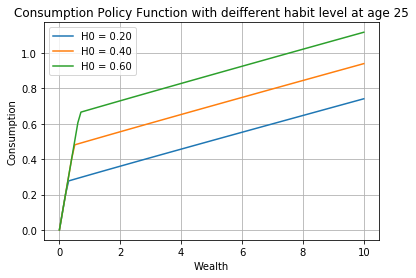

In [3]:
### Figure 1: See how different habit states change the consumption

# The habit parameters
Hgamma = 0.8
Hlambda = 0.5

# Run the model
dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist() # habit catch-up speed was incorporated in the growth factor
agent = cpm.PortfolioConsumerType(**dict_portfolio)
agent.solve()


# Create a grid of market resources for the plots
    
mMin = 0    # Minimum ratio of assets to income to plot
mMax = 10 # Maximum ratio of assets to income to plot
mPts = 100 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot

### Habit
# Plot different habit states at age 25- Figure 1
plt.figure()
# Rather than generating different states of habits, we simply suppose different initial habit levels to check the qualitative results.
for H0 in [0.2,0.4,0.6]:
    
    H = np.ones(81)*H0 # generates habit stocks for every life period
    H = H0**(Hgamma*(1-CRRA)) # define the factor that will be used in normalization

    norm_factor = norm_factor_0/H # define the factor that will be used in normalization

    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].cFuncAdj(eevalgrid/norm_factor[a-age_born])*norm_factor[a-age_born],
             label = 'H0 = {:.2f}'.format(H0))
plt.xlabel('Wealth')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function with deifferent habit level at age 25')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

We can see that lower habits generate a higher level of saving than higher habit levels.

## Consumption with different habit importance and catch-up speed
Authors showed in figure 2 that the consumption function with mean habit level associated with the simulations of the model decreases faster than the one without the habits. The key finding here is that the consumption with habit decreases faster, and is reproduced using the habit stock different than that used by the author. The change in habit stock actually has the same effect when altering the importance factor of habit $\gamma$, and the results is showed in figure 4 that consumption function with higher importance decreases faster, consistent with the findings in figure 2.

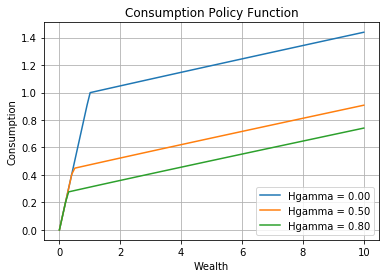

In [4]:
### Figure 2 and 4: See how Hgamma and Hlambda change the consumption

plt.figure()
for Hgamma in [0, 0.5, 0.8]: # set the different level of habit importance from low to high
    H0=0.2 # use 0.2 as the initial habit level
    H = np.ones(81)*H0
    H = H0**(Hgamma*(1-CRRA))
             
    norm_factor = norm_factor_0/H

    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].cFuncAdj(eevalgrid/norm_factor[a-age_born])*norm_factor[a-age_born],
             label = 'Hgamma = {:.2f}'.format(Hgamma))
plt.xlabel('Wealth')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

## Share of wealth in stock
The author argued that the presence of future labor income increases the demand for stocks, but this needs to be compared to the share function without income shocks and cannot be inferred simply from figure 3.
In addition, a higher habit importance has in fact the same effect as the high habit stocks, showing that lower habit importance generates a higher level of saving than higher habit imprtance. The result is consistent with figure 1. 
The following replication shows the same order of share function with different habit importance, but differ with the figure in the initial range of cash-on-hand. The author's figure shows initial range of cash-on-hand for which positive savings take place for the lowest habit states, thus generating positive stock holdings, while no savings occur under the highest states.
The replication successfully replicated that, for high levels of liquid wealth a higher habit level is associated with a higher share. Based on the inference before, a higher habit level is associated with lower saving rate, generating a smaller  ratio of savings to future labor income for a given level of cash on hand. Therefore they will invest larger proportion of their savings to risky assets. 

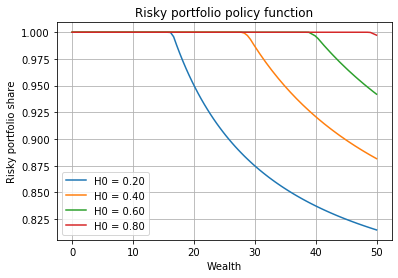

In [5]:
### Figure 3: See how different habit states change the share of wealth in stock.

# The habit parameters
Hgamma = 0.8
Hlambda = 0.5

# Run the model
dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
agent = cpm.PortfolioConsumerType(**dict_portfolio)
agent.solve()

# Create a grid of market resources for the plots
    
mMin = 0    # Minimum ratio of assets to income to plot
mMax = 50 # Maximum ratio of assets to income to plot
mPts = 100 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot


# Plot share of wealth with different habit states- Figure 3
plt.figure()
for H0 in [0.2,0.4,0.6, 0.8]:

    H = np.ones(81)*H0
    H = H0**(Hgamma*(1-CRRA))

    norm_factor = norm_factor_0/H

    
    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].ShareFuncAdj(eevalgrid/norm_factor[a-age_born]),
             label = 'H0 = {:.2f}'.format(H0))
plt.xlabel('Wealth')
plt.ylabel('Risky portfolio share')
plt.title('Risky portfolio policy function')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

## Insensitivity
Here we test the claimed the insensitivity of catch-up speed to consumption, and insensitivity of habit importance and catch-up speed to share function.
The replicatin with change in Hgamma is insentive to share function, but the replication with change in Hlambda does not replicate the results, due to the techniques I used. I incorporate the Hlambda with the income growth factor, and thus changing the Hlambda in fact changed the present value of income and will affect the agent's allocation decision.

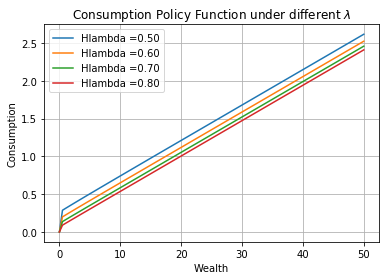

In [6]:
### Try to reproduce the result that the catch-up speed Hlambda is not very important for consumption function- page 739's description

Hgamma = 0.8
H0=0.2
H = np.ones(82)*H0
H = H0**(Hgamma*(1-CRRA))
    
norm_factor = norm_factor_0/H

mMin = 0    # Minimum ratio of assets to income to plot
mMax = 50 # Maximum ratio of assets to income to plot
mPts = 100 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot



plt.figure()
for Hlambda in [0.5, 0.6, 0.7, 0.8]:

    # Run the model
    dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
    agent = cpm.PortfolioConsumerType(**dict_portfolio)
    agent.solve()
    
    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].cFuncAdj(eevalgrid/norm_factor[a-age_born])*norm_factor[a-age_born],
             label = 'Hlambda ={:.2f}'.format(Hlambda))
plt.xlabel('Wealth')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function under different $\lambda$')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

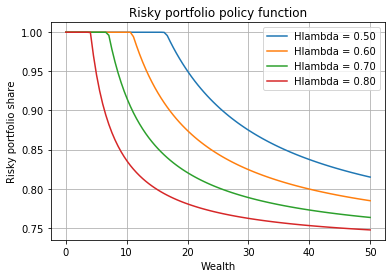

In [7]:
### Try to reproduce the result that the catch-up speed Hlambda is not very important for share function- page 739's description

Hgamma = 0.8
H0=0.2
H = np.ones(82)*H0
H = H0**(Hgamma*(1-CRRA))
    
norm_factor = norm_factor_0/H

mMin = 0    # Minimum ratio of assets to income to plot
mMax = 50 # Maximum ratio of assets to income to plot
mPts = 100 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot



plt.figure()
for Hlambda in [0.5, 0.6, 0.7, 0.8]:

    # Run the model
    dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
    agent = cpm.PortfolioConsumerType(**dict_portfolio)
    agent.solve()
    
    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].ShareFuncAdj(eevalgrid/norm_factor[a-age_born]),
             label = 'Hlambda = {:.2f}'.format(Hlambda))
plt.xlabel('Wealth')
plt.ylabel('Risky portfolio share')
plt.title('Risky portfolio policy function')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

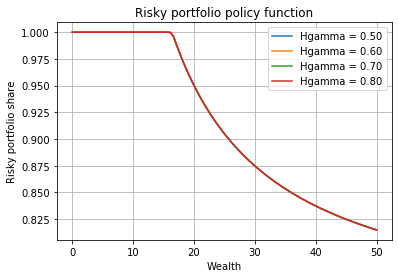

In [8]:
### Try to reproduce the result that the habit importance Hgamma does not really affect share function- page 739's description

Hlambda = 0.5
H0=0.2
H = np.ones(82)*H0
H = H0**(Hgamma*(1-CRRA))
    
norm_factor = norm_factor_0/H

mMin = 0    # Minimum ratio of assets to income to plot
mMax = 50 # Maximum ratio of assets to income to plot
mPts = 100 # Number of points to plot 

eevalgrid = np.linspace(0,mMax,mPts) # range of values of assets for the plot



plt.figure()
for Hgamma in [0.5, 0.6, 0.7, 0.8]:

    # Run the model
    dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
    agent = cpm.PortfolioConsumerType(**dict_portfolio)
    agent.solve()
    
    # Ages
    ages = [25]
    age_born = time_params['Age_born']

    a = 25
    plt.plot(eevalgrid,
             agent.solution[a-age_born].ShareFuncAdj(eevalgrid/norm_factor[a-age_born]),
             label = 'Hgamma = {:.2f}'.format(Hgamma))
plt.xlabel('Wealth')
plt.ylabel('Risky portfolio share')
plt.title('Risky portfolio policy function')
plt.legend()
plt.grid()


if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

Here the replication shows that the share is not sensitive to habit importance since it does not affect risk attitude.

## Constant Habit 
Given the paper is right that Hlambda does not affect both consumption and risky share decision, to simplify the programming, we can actually let Hlambda = 0, meaning that the habit is constant at a certain level throught the agent's whole life cycle, and get the same qualitative or even quantitative result.

### Simulations

Using the policy functions obtained from solving the model we present a series of simulations to highlight features of the model.

We first run a few simulations to verify the quality of our calibration.

The figures below show simulated levels of permanent income and risky portfolio shares for 50 agents over their life spans. We can see the model generates a heterogeneous permanent income distribution. Interestingly, we have the same couterfactual prediction of the
model: households invest almost all of their wealth in stocks throughout the life-cycle (and therefore stock market participation takes place as soon as positive saving is undertaken)

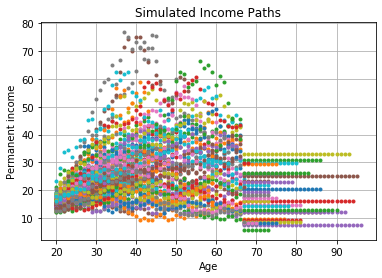

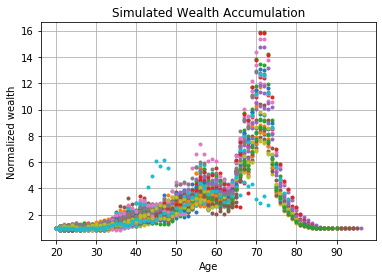

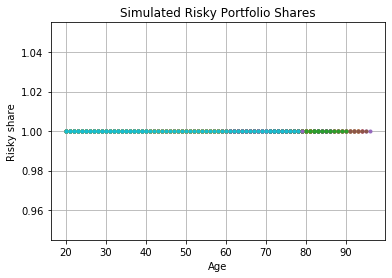

In [9]:
# Set up simulation parameters

Hlambda = 0 # Constant Habit
# Rerun the model
dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
agent = cpm.PortfolioConsumerType(**dict_portfolio)
agent.solve()
    
# Number of agents and periods in the simulation.
agent.AgentCount = 50 # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 80

# Set up the variables we want to keep track of.
agent.track_vars = ['aNrmNow','cNrmNow', 'pLvlNow', 't_age', 'ShareNow','mNrmNow']

# Run the simulations
agent.initializeSim()
agent.simulate()

# Present diagnostic plots.
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.pLvlNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Permanent income')
plt.title('Simulated Income Paths')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.mNrmNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Normalized wealth')
plt.title('Simulated Wealth Accumulation')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)    
    
    
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.ShareNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Risky share')
plt.title('Simulated Risky Portfolio Shares')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

#### The average life cycle patterns

We now compare the behavior of the mean values of variables of interest at different ages, conditional on survival. 
The plot below illustrates the average dynamics across all of the simulated agents of market resources and risky shares with habit that replicate figures 7 and figure 8. The plot follows the general pattern observed in the original paper. 
The average outcomes without habits requires a more fundamental change in the solution techniques used here.

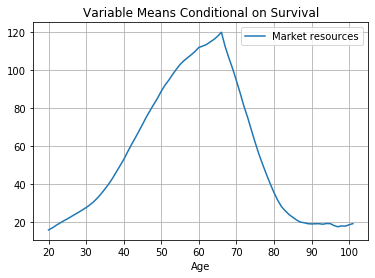

<Figure size 432x288 with 0 Axes>

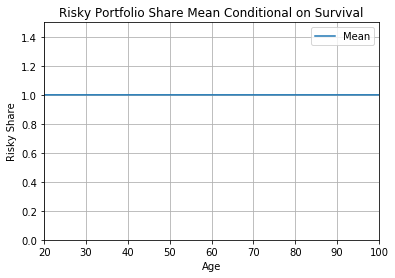

In [10]:
# Number of agents and periods in the simulation.
agent.AgentCount = 50 # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 80*50

# Run the simulations
agent.initializeSim()
agent.simulate()

raw_data = {'Age': agent.t_age_hist.flatten()+time_params['Age_born'],
            'pIncome': agent.pLvlNow_hist.flatten(),
            'rShare': agent.ShareNow_hist.flatten(),
            'nrmM': agent.mNrmNow_hist.flatten(),
            'nrmC': agent.cNrmNow_hist.flatten()}

Data = pd.DataFrame(raw_data)
Data['Cons'] = Data.nrmC * Data.pIncome
Data['M'] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(['Age']).mean().reset_index()
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.M,
         label = 'Market resources')
plt.legend()
plt.xlabel('Age')
plt.title('Variable Means Conditional on Survival')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)
    
plt.figure()
plt.plot

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.rShare, label = 'Mean')
plt.legend()

axes = plt.gca()
axes.set_xlim([20,100])
axes.set_ylim([0,1.5])

plt.xlabel('Age')
plt.ylabel('Risky Share')
plt.title('Risky Portfolio Share Mean Conditional on Survival')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

### Other results in the original paper

#### Results with fixed participation cost


#### Additive habit model


### Conclusion

The authors conclude that the inclusion of habit in the life cycle choice model does not help to explain the empirical evidence of low stock holdings in assets. With internal habit, the intertemporal consumption smoothing becomes more important and households increase their wealth accumulation. As a result, they have a stronger incentive to pay the stock market entry cost and start investing in equities very early in life. Moreover, after paying the fixed cost, they invest virtually all of their wealth in stocks. 
### Comparison with Cocco et al. (2005)
This article does not provide explanation for how the optimal rsiky asset decreases with wealth, which is addressed by Cocco et al. (2005). In fact, the paper imply a counterfactual almost 100% stock market participation throught the whole life shown in the simulation.
Both paper shown that the optimal risky asset share decreases in wealth. Both paper also agree that labor income increases risky asset holdings, as it is seen as a closer substitute of risk-free assets. 
Another reason for the discrepancy may come form the different calibration parameters use in two papers. The following is the robustness check with several interesting parameters. 




part worthwhile to mention that, in calibration parameters, two papers use quite different magnitude of CRRA coefficients, which are 10 in this paper and 2 in Cocco et al. (2005). The low risk aversion used in this paper's calibration may be the reason why the simulated portfolio share is quiet constant at 1 throughout the whole life. 

#### Risk aversion
set back the risk aversion from low (=2) to high (=10 in Cocco et al.). The replication below reproduce the similar share function as shown in CGMPortfolio.ipynb. This make sense since if the agent is not sensitive to risk, it will be optimal to put more share of wealth in the stock markets.

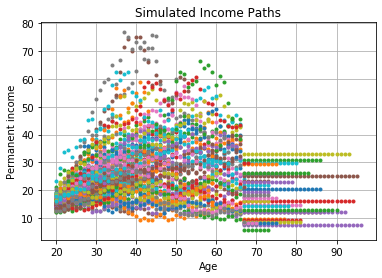

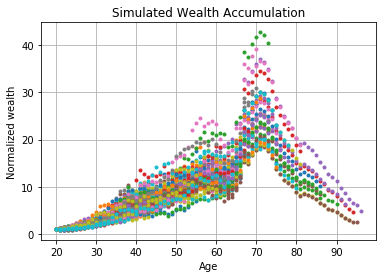

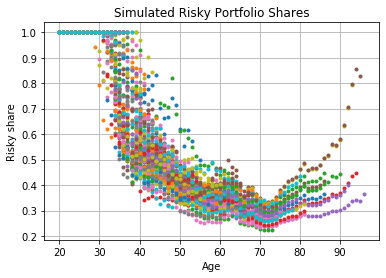

In [11]:
# Set up simulation parameters
#std_tran_shock = np.sqrt(0.0738)
#std_perm_shock = np.sqrt(0.0106)

Hlambda = 0 # Constant Habit
CRRA = 10 # Cocco et al.
dict_portfolio['CRRA'] = CRRA
# Rerun the model
dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
agent = cpm.PortfolioConsumerType(**dict_portfolio)
agent.solve()
    
# Number of agents and periods in the simulation.
agent.AgentCount = 50 # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 80

# Set up the variables we want to keep track of.
agent.track_vars = ['aNrmNow','cNrmNow', 'pLvlNow', 't_age', 'ShareNow','mNrmNow']

# Run the simulations
agent.initializeSim()
agent.simulate()

# Present diagnostic plots.
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.pLvlNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Permanent income')
plt.title('Simulated Income Paths')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.mNrmNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Normalized wealth')
plt.title('Simulated Wealth Accumulation')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)    
    
    
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.ShareNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Risky share')
plt.title('Simulated Risky Portfolio Shares')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

#### Income distribution
Two papers also use different distribution of permanent income. Since both paper agree that permanent income is more like the substitute to risk free asset, it is expected that the distribution of income may also affect their share in wealth. The following robustness check simulation revert permanent and transitory shocks back to Cocco's level, maintaining CRRA =2, but the share functin does not change much. This may suggest that the change in CRRA has dominant effect.

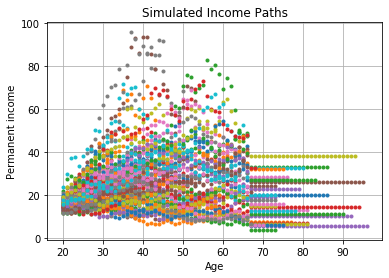

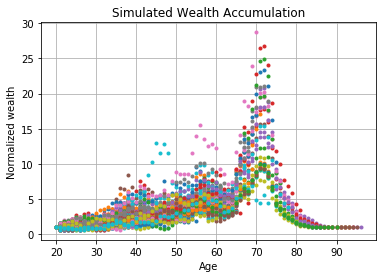

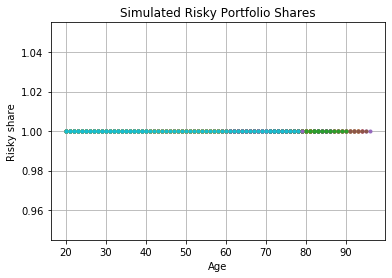

In [12]:
# Set up simulation parameters
std_tran_shock = np.sqrt(0.0738)
std_perm_shock = np.sqrt(0.0106)

# Vectorize. (HARK turns off these shocks after T_retirement)
std_tran_vec = np.array([std_tran_shock]*(t_end-t_start))
std_perm_vec = np.array([std_perm_shock]*(t_end-t_start))

dict_portfolio['PermShkStd'] = std_perm_vec
dict_portfolio['TranShkStd'] = std_tran_vec

Hlambda = 0 # Constant Habit
dict_portfolio['CRRA'] = 2 # set CRRA back to 2
# Rerun the model
dict_portfolio['PermGroFac'] = (gr_fac*(1-Hlambda)).tolist()
agent = cpm.PortfolioConsumerType(**dict_portfolio)
agent.solve()
    
# Number of agents and periods in the simulation.
agent.AgentCount = 50 # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 80

# Set up the variables we want to keep track of.
agent.track_vars = ['aNrmNow','cNrmNow', 'pLvlNow', 't_age', 'ShareNow','mNrmNow']

# Run the simulations
agent.initializeSim()
agent.simulate()

# Present diagnostic plots.
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.pLvlNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Permanent income')
plt.title('Simulated Income Paths')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.mNrmNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Normalized wealth')
plt.title('Simulated Wealth Accumulation')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)    
    
    
plt.figure()
plt.plot(agent.t_age_hist+time_params['Age_born'], agent.ShareNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Risky share')
plt.title('Simulated Risky Portfolio Shares')
plt.grid()

if not in_ipynb():
    plt.show(block=False) 
    plt.pause(1)
else:
    plt.show(block=True)

In [13]:
np.sqrt(0.0738)

0.2716615541441225

### Bibliographic entry of the original article

In [14]:
### Bibtex entry
'''
@Article{RePEc:red:issued:v:6:y:2003:i:4:p:729-766,
  author={Francisco Gomes and Alexander Michaelides},
  title={{Portfolio Choice With Internal Habit Formation: A Life-Cycle Model With Uninsurable Labor Income Risk}},
  journal={Review of Economic Dynamics},
  year=2003,
  volume={6},
  number={4},
  pages={729-766},
  month={October},
  keywords={Life-cycle asset allocation; Habit formation; Liquidity constraints; Stock market participation cost},
  doi={10.1016/S1094-2025(03)000},
  abstract={Motivated by the success of internal habit formation preferences in explaining asset pricing puzzles, we introduce these preferences in a life-cycle model of consumption and portfolio choice with liquidity constraints, undiversifiable labor income risk and stock-market participation costs. In contrast to the initial motivation, we find that the model is not able to simultaneously match two very important stylized facts: a low stock market participation rate, and moderate equity holdings for those households that do invest in stocks. Habit formation increases wealth accumulation because the intertemporal consumption smoothing motive is stronger. As a result, households start participating in the stock market very early in life, and invest their portfolios almost fully in stocks. Therefore, we conclude that, with respect to its ability to match the empirical evidence on asset allocation behavior, the internal habit formation model is dominated by its time-separable utility counterpart. (Copyright: Elsevier)},
  url={https://ideas.repec.org/a/red/issued/v6y2003i4p729-766.html}
}
'''

'\n@Article{RePEc:red:issued:v:6:y:2003:i:4:p:729-766,\n  author={Francisco Gomes and Alexander Michaelides},\n  title={{Portfolio Choice With Internal Habit Formation: A Life-Cycle Model With Uninsurable Labor Income Risk}},\n  journal={Review of Economic Dynamics},\n  year=2003,\n  volume={6},\n  number={4},\n  pages={729-766},\n  month={October},\n  keywords={Life-cycle asset allocation; Habit formation; Liquidity constraints; Stock market participation cost},\n  doi={10.1016/S1094-2025(03)000},\n  abstract={Motivated by the success of internal habit formation preferences in explaining asset pricing puzzles, we introduce these preferences in a life-cycle model of consumption and portfolio choice with liquidity constraints, undiversifiable labor income risk and stock-market participation costs. In contrast to the initial motivation, we find that the model is not able to simultaneously match two very important stylized facts: a low stock market participation rate, and moderate equity 